import

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.express as px
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')  # Specific resource for tokenization tables
nltk.download('wordnet')    # Needed for lemmatization
nltk.download('omw-1.4')    # Required for WordNet
import plotly.graph_objs as go
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from PIL import Image
from plotly import tools
from plotly.offline import init_notebook_mode,iplot,plot
from nrclex import NRCLex
from nltk.corpus import stopwords
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
stop = stopwords.words('english')
import sys
print(sys.version)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...


3.9.6 (tags/v3.9.6:db3ff76, Jun 28 2021, 15:26:21) [MSC v.1929 64 bit (AMD64)]


In [31]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [32]:
df = pd.read_csv('D:\project\python_project\dataset_simpson\simpsons_script_lines.csv')
df.head(5)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12764\775248427.py:1: DtypeWarning:

Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.



,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40.0,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33


In [33]:
df = df.head(6000)

In [34]:
df['word_count'] = df['word_count'].fillna(0).astype(int)
df.dtypes

id                      int64
episode_id              int64
number                  int64
raw_text               object
timestamp_in_ms        object
speaking_line          object
character_id           object
location_id           float64
raw_character_text     object
raw_location_text      object
spoken_words           object
normalized_text        object
word_count              int32
dtype: object

teksprocssessing

In [36]:
from nltk.stem import WordNetLemmatizer  # <-- Add this import

description_list = []
for description in df['normalized_text']:
    if pd.isna(description):
        description_list.append("")
        continue
    description = re.sub("[^a-zA-Z]", " ", description)
    description = description.lower()
    description = nltk.word_tokenize(description)
    description = [word for word in description if word not in set(stopwords.words("english"))]
    
    lemma = WordNetLemmatizer()  # <-- Use the imported class
    description = [lemma.lemmatize(word) for word in description]
    
    description = " ".join(description)
    description_list.append(description)

df["normalized_text_new"] = description_list

In [37]:
for i,row in df.iterrows():
    print(row['character_id'],row['raw_character_text'])

464.0 Miss Hoover
9.0 Lisa Simpson
464.0 Miss Hoover
9.0 Lisa Simpson
40.0 Edna Krabappel-Flanders
38.0 Martin Prince
40.0 Edna Krabappel-Flanders
8.0 Bart Simpson
nan nan
9.0 Lisa Simpson
469.0 Landlady
9.0 Lisa Simpson
469.0 Landlady
9.0 Lisa Simpson
469.0 Landlady
9.0 Lisa Simpson
nan nan
8.0 Bart Simpson
101.0 Nelson Muntz
8.0 Bart Simpson
467.0 Terri/sherri
8.0 Bart Simpson
25.0 Milhouse Van Houten
8.0 Bart Simpson
8.0 Bart Simpson
25.0 Milhouse Van Houten
8.0 Bart Simpson
8.0 Bart Simpson
53.0 Wendell Borton
nan nan
8.0 Bart Simpson
40.0 Edna Krabappel-Flanders
8.0 Bart Simpson
40.0 Edna Krabappel-Flanders
470.0 Kid Reporter
nan nan
41.0 Conductor
9.0 Lisa Simpson
465.0 BERGSTROM
9.0 Lisa Simpson
465.0 BERGSTROM
9.0 Lisa Simpson
465.0 BERGSTROM
9.0 Lisa Simpson
465.0 BERGSTROM
9.0 Lisa Simpson
465.0 BERGSTROM
9.0 Lisa Simpson
465.0 BERGSTROM
9.0 Lisa Simpson
465.0 BERGSTROM
465.0 BERGSTROM
9.0 Lisa Simpson
41.0 Conductor
9.0 Lisa Simpson
465.0 BERGSTROM
nan nan
2.0 Homer Simpson


In [38]:
val_homer=[]
val_bart=[]
val_marge=[]
val_lisa=[]

for i,row in df.iterrows():
    val = row['normalized_text_new']
    if row['character_id'] == 2:
        val_homer.append(val)
    elif row['character_id']== 8:
        val_bart.append(val)
    elif row['character_id'] == 1:
        val_marge.append(val)
    elif row['character_id']== 9:
        val_lisa.append(val)    

In [39]:
pat = r'\b(?:{})\b'.format('|'.join(stop))
def text_cleaning(val_list):
    df1 = DataFrame (val_list,columns =['normalized_text_new']).dropna()
    df1["normalized_text_new"] = df1["normalized_text_new"].str.replace(pat, '')
    df1["normalized_text_new"] = df1["normalized_text_new"].str.replace(r'\s+', ' ')
    return df1

In [40]:
bart = text_cleaning(val_bart)
homer = text_cleaning(val_homer)
marge = text_cleaning(val_marge)
lisa = text_cleaning(val_lisa)

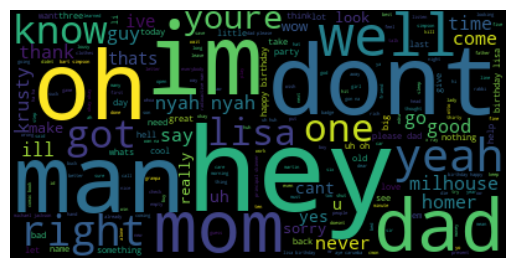

In [41]:
wc = WordCloud()
wc.generate(' '.join(bart['normalized_text_new']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [42]:

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [43]:
def plot(x,char,name,w,p):
    common_words = x(char['normalized_text_new'], 20)
    common_words_df = DataFrame (common_words,columns=['word','freq'])

    plt.figure(figsize=(16, 10))
    sns.barplot(x='word', y='freq', data=common_words_df,palette=p)
    plt.title("Top 20 "+w+" used by "+name, fontsize=16)
    plt.ylabel("Frequency", fontsize=14)
    plt.yticks(fontsize=13)
    plt.xticks(rotation=90, fontsize=13)
    plt.xlabel("");

NRCLex¶
NRCLex will measure emotional affect from a body of text. Affect dictionary contains approximately 27,000 words, and is based on the National Research Council Canada (NRC) affect lexicon and the NLTK library's WordNet synonym sets.

Emotional affects measured include the following:

fear
anger
anticipation
trust
surprise
positive
negative
sadness
disgust
joy

In [44]:
text_object = NRCLex(' '.join(df['normalized_text_new']))
text_object.affect_frequencies

{'fear': 0.07447587354409317,
 'anger': 0.058502495840266226,
 'anticip': 0.0,
 'trust': 0.12425956738768719,
 'surprise': 0.05883527454242928,
 'positive': 0.19534109816971715,
 'negative': 0.14069883527454244,
 'sadness': 0.06748752079866889,
 'disgust': 0.0578369384359401,
 'joy': 0.10768718801996673,
 'anticipation': 0.11487520798668885}

In [45]:
text_object.top_emotions

[('positive', 0.19534109816971715)]

In [46]:
sentiment_scores = pd.DataFrame(list(text_object.raw_emotion_scores.items())) 

In [49]:
sentiment_scores = sentiment_scores.rename(columns={0: "Sentiment", 1: "Count"})
sentiment_scores

,sentiment,score
6,positive,2935
3,negative,2114
5,trust,1867
7,anticipation,1726
8,joy,1618
2,fear,1119
4,sadness,1014
9,surprise,884
0,anger,879
1,disgust,869


In [61]:
fig = px.pie(sentiment_scores, values='score', names='sentiment',
             title='Sentiment Scores',
             hover_data=['sentiment'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed